In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df_train = pd.read_csv("train.csv")

In [47]:
df_train.head()

,id3,user_id,id2,date,id1
0,714,464300,34,1,4
1,714,915655,34,1,4
2,316,262696,42,1,2
3,52,354280,4,1,10
4,581,218912,14,1,10


In [48]:
df_train.shape

(46996828, 5)

Let's change the reordering of the columns to make things more readable:

In [49]:
df_train = df_train.reindex(columns=['user_id', 'date', 'id1', 'id2', 'id3'])

In [51]:
df_train.sort_values(['user_id'])

,user_id,date,id1,id2,id3
26280155,0,26,10,14,581
21496383,0,22,8,103,142
21537403,0,22,9,109,310
21392408,0,22,7,23,897
22005663,0,22,12,66,111
15615460,0,16,10,14,685
42912620,0,46,10,14,581
22065002,0,22,7,22,737
22363250,0,22,10,14,685
21925232,0,22,4,98,716


Determining the number of unique users: We have data for more than 1 mio users.

In [72]:
uqs = np.unique(df_train['user_id'])
uqs.size

1079572

Some information one the number of products

In [53]:
print("Number of first categories: %d" % np.unique(df_train['id1']).size)
print("Number of second categories: %d" % np.unique(df_train['id2']).size)
print("Number of third categories: %d" % np.unique(df_train['id3']).size)

Number of first categories: 16
Number of second categories: 122
Number of third categories: 924


## Evaluating the similarity of two categories
We define the similarity of two categories $c_1$, $c_2$ as $$ S(c_1, c_2) = \frac{|N(c_1) \cap N(c_1)|}{|N(c_2) \cup N(c_2)|}$$ where $N(c)$ is the set of users of a category.

Level = 0


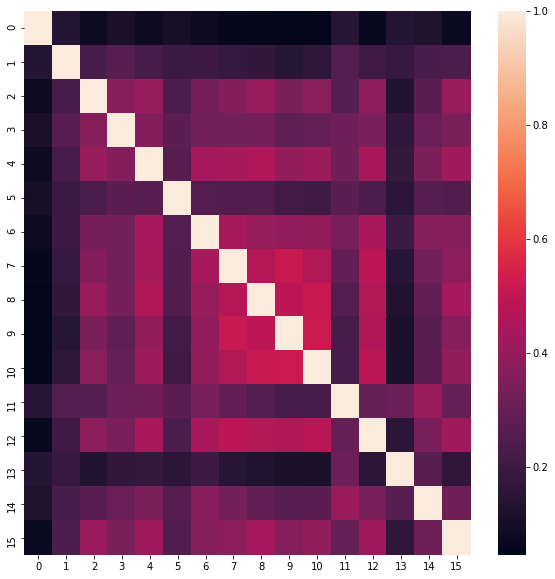

Level = 1


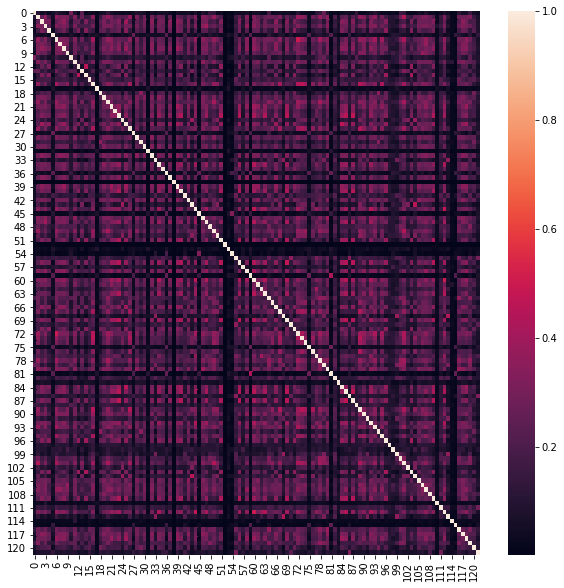

Level = 2


KeyboardInterrupt: 

In [75]:
%%time
level_items = [16, 122, 924]
level_names = ['id1', 'id2', 'id3']

for level in range(2,3):
    print("Level = %d" % level)
    N_items = level_items[level]
    l_name = level_names[level]
    
    similarity_matrix = np.zeros((N_items, N_items))
    for c1 in range(0, N_items):
        s1 = np.unique(df_train[df_train[l_name] == c1]['user_id'])
        for c2 in range(c1, N_items):
            s2 = np.unique(df_train[df_train[l_name] == c2]['user_id'])
            similarity_matrix[c2, c1] = similarity_matrix[c1, c2] = np.intersect1d(s1, s2, assume_unique=True).size / np.union1d(s1, s2).size
            
    plt.figure(figsize = (10, 10))
    sns.heatmap(similarity_matrix)
    plt.show()


In [68]:
%%time
level_items = [16, 122, 924]
level_names = ['id1', 'id2', 'id3']

for level in range(2,3):
    print("Level = %d" % level)
    N_items = level_items[level]
    l_name = level_names[level]
    
    similarity_matrix = np.zeros((N_items, N_items))
    for c1 in range(0, N_items):
        s1 = np.unique(df_train[df_train[l_name] == c1]['user_id'])
        for c2 in range(c1, N_items):
            s2 = np.unique(df_train[df_train[l_name] == c2]['user_id'])
            similarity_matrix[c2, c1] = similarity_matrix[c1, c2] = np.intersect1d(s1, s2, assume_unique=True).size / np.union1d(s1, s2).size
            
    plt.figure(figsize = (10, 10))
    sns.heatmap(similarity_matrix)
    plt.show()

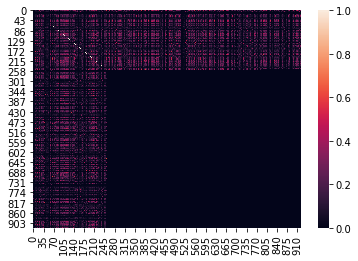

In [85]:
sns.heatmap(similarity_matrix)

In [ ]:
df_train.head()

In [23]:
different_products['count'] = different_products['user_id']

In [26]:
different_products.drop(['user_id', 'date'], inplace=True, axis=1)

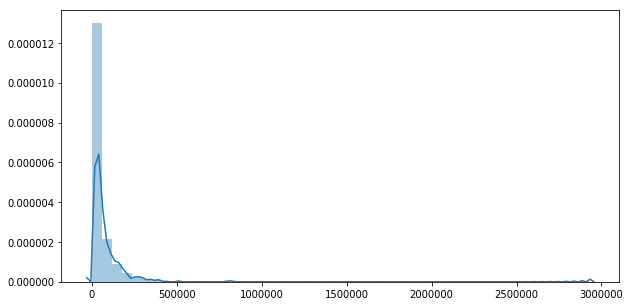

In [30]:
plt.figure(figsize=(10, 5))
sns.distplot(different_products)

In [36]:
different_products.median()

count    21765.0
dtype: float64

In [42]:
first_categories = np.unique(df_train['id3'])

In [43]:
first_categories.size

924